# Tri de listes chaînées



## Une implémentation des listes chaînées

Voici maintenant le code de l'implémentation des listes chaînées :

In [35]:
from __future__ import annotations
from typing import Generic, TypeVar, Optional
import random
from mon_viz import viz

T = TypeVar("T")

class Maillon(Generic[T]):

    def __init__(self, val: T) -> None:
        self._val = val
        self._suiv: Optional[Maillon[T]] = None

    def get_val(self) -> T:
        return self._val 

    def get_suiv(self) -> Optional[Maillon[T]]:
        return self._suiv

    def set_suiv(self, m: Optional[Maillon[T]]) -> None:
        if m is None or (type(m._val) == type(self._val)):
            self._suiv = m
        else:
            raise TypeError(f"Insertion d'un {str(type(m._val))[7:-1]} dans une liste de {str(type(self._val))[7:-1]}")  


class ListeC(Generic[T]):

    def __init__(self) -> None:
        self._tete: Optional[Maillon[T]] = None

    def est_vide(self) -> bool:
        return self._tete is None

    def get_val_tete(self) -> T:
        if self.est_vide():
            raise ValueError("Une liste vide n'a pas de tête")
        return self._tete.get_val()

    def get_suiv_tete(self) -> T:
        return self._tete.get_suiv()

    def queue(self) -> ListeC[T]:
        qt: ListeC[T] = ListeC()
        if not self._tete is None:
            qt._tete = self._tete.get_suiv() 
        return qt

    def set_tete(self, val: T) -> ListeC[T]:
        if self._tete is None:
            self._tete = Maillon(val)
            return self
        else:
            t = Maillon(val)
            t.set_suiv(self._tete)
            self._tete = t
            return self
    
    def taille(self) -> int:
        if self.est_vide():
            return 0
        else:
            return 1 + self.queue().taille()
        
    def retourne(self) -> ListeC:
        copie = self
        retournée = ListeC()
        while not copie.est_vide():
            retournée.set_tete(copie.get_val_tete())
            copie = copie.queue()
        return retournée

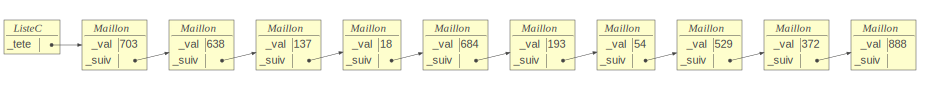

In [36]:
ls = ListeC()
for nb in random.choices(range(1000), k = 10):
    ls = ls.set_tete(nb)
viz(ls)

In [37]:
ls.taille()

10

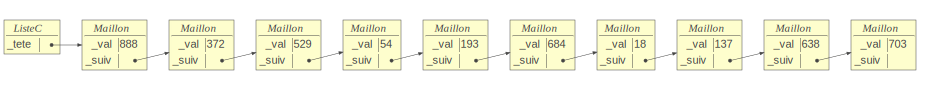

In [38]:
viz(ls.retourne())

## Tris

### Tri par insertion

In [86]:
def ins_rec(carte, jeu):
    if jeu.est_vide() or carte <= jeu.get_val_tete():
        return jeu.set_tete(carte)
    return ins_rec(carte, jeu.queue()).set_tete(jeu.get_val_tete())

def tri_ins_rec(pioche):
    if pioche.est_vide():
        return ListeC()
    tete = pioche.get_val_tete()
    queue = pioche.queue()
    return ins_rec(tete, tri_ins_rec(queue))

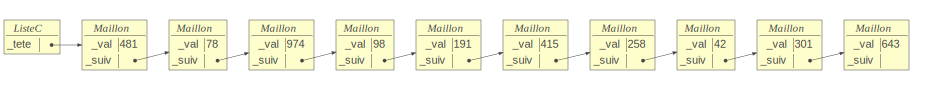

In [4]:
viz(ls)

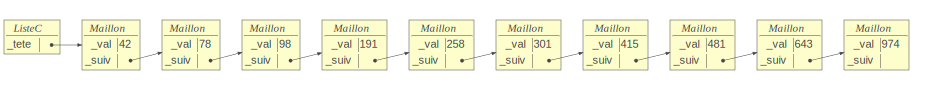

In [5]:
viz(tri_ins_rec(ls))

In [6]:
ls = ListeC()
for nb in random.choices(range(1000), k = 100):
    ls = ls.set_tete(nb)

In [7]:
%timeit tri_ins_rec(ls)

6.8 ms ± 44.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
ls = ListeC()
for nb in random.choices(range(1000), k = 200):
    ls = ls.set_tete(nb)

In [9]:
%timeit tri_ins_rec(ls)

29.2 ms ± 739 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
ls = ListeC()
for nb in random.choices(range(1000), k = 400):
    ls = ls.set_tete(nb)

In [11]:
%timeit tri_ins_rec(ls)

101 ms ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
ls = ListeC()
for nb in random.choices(range(1000), k = 800):
    ls = ls.set_tete(nb)

In [13]:
%timeit tri_ins_rec(ls)

395 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Visualisation


In [83]:
import matplotlib.pyplot as plt
from time import perf_counter
from numpy.random import choice

def liste(n):
    xs = choice(range(10*n), n)
    ls = ListeC()
    for x in xs:
        ls = ls.set_tete(x)
    return ls


def temps(tri, n):
    p = liste(n)
    debut = perf_counter()
    tri(p)
    return perf_counter() - debut

def liste_temps(tri, n):
    xs, ts = [], []
    while n < 3000:
        t = temps(tri, n)
        ts.append(t)
        xs.append(n)
        n = int(n*1.1)
    return xs, ts

def compare(tri, n):
    ts = []
    t1 = temps(tri, n)
    for _ in range(8):
        t2 = temps(tri, 2*n)
        ts.append(t2/t1)
        t1 = t2
        n *= 2
        print(n, ts)
    return ts


In [15]:
compare(tri_ins_rec, 50)

100 [3.671376906737036]
200 [3.671376906737036, 3.544018391038181]
400 [3.671376906737036, 3.544018391038181, 3.4920853893274177]
800 [3.671376906737036, 3.544018391038181, 3.4920853893274177, 4.251072093627016]
1600 [3.671376906737036, 3.544018391038181, 3.4920853893274177, 4.251072093627016, 3.9554143349051962]


RecursionError: maximum recursion depth exceeded while calling a Python object

In [65]:
import sys 
  
limit = sys.getrecursionlimit()
print(f'Avant le changement, la limite de la pile est  {limit} appels récursifs') 

Avant le changement, la limite de la pile est  3000 appels récursifs


In [66]:
sys.setrecursionlimit(100000) 

In [18]:
compare(tri_ins_rec, 50)

100 [1.423235577546877]
200 [1.423235577546877, 4.522265553627607]
400 [1.423235577546877, 4.522265553627607, 3.2442707100382897]
800 [1.423235577546877, 4.522265553627607, 3.2442707100382897, 4.610885723376685]
1600 [1.423235577546877, 4.522265553627607, 3.2442707100382897, 4.610885723376685, 4.438106529696306]
3200 [1.423235577546877, 4.522265553627607, 3.2442707100382897, 4.610885723376685, 4.438106529696306, 4.727076533597379]
6400 [1.423235577546877, 4.522265553627607, 3.2442707100382897, 4.610885723376685, 4.438106529696306, 4.727076533597379, 4.321955024913842]
12800 [1.423235577546877, 4.522265553627607, 3.2442707100382897, 4.610885723376685, 4.438106529696306, 4.727076533597379, 4.321955024913842, 4.188003568422788]


[1.423235577546877,
 4.522265553627607,
 3.2442707100382897,
 4.610885723376685,
 4.438106529696306,
 4.727076533597379,
 4.321955024913842,
 4.188003568422788]

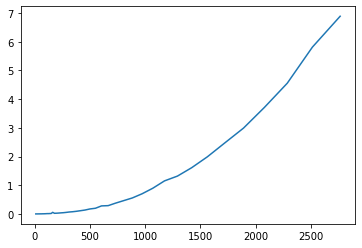

In [19]:
x, y = liste_temps(tri_ins_rec, 10)
plt.plot(x, y)
plt.show()

### Tri fusion

#### 1- Avec les listes Python

In [62]:
def fusion1(xs: list, ys: list) -> list:
    if len(xs) == 0 or len(ys) == 0:
        return xs + ys
    else:
        if xs[0] <= ys[0]:
            return [xs[0]] + fusion1(xs[1:], ys)
        else:
            return [ys[0]] + fusion1(xs, ys[1:])
  
def tri_fusion1(xs: list) -> list:
    t = len(xs) 
    if t < 2:
        return xs
    return fusion1(tri_fusion1(xs[:t//2]), tri_fusion1(xs[t//2:])) 

In [72]:
%timeit tri_fusion1(list(random.choices(range(100000), k = 100)))

261 µs ± 2.48 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [73]:
%timeit tri_fusion1(list(random.choices(range(100000), k = 200)))

646 µs ± 6.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [74]:
%timeit tri_fusion1(list(random.choices(range(100000), k = 300)))

1.13 ms ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [75]:
%timeit tri_fusion1(list(random.choices(range(100000), k = 400)))

1.66 ms ± 6.01 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### 2- Avec nos listes chaînées

In [76]:
def tranche(xs: ListeC, debut: int, fin: int) -> listeC:
    slice = ListeC()
    copie = xs
    jeté = 0
    while jeté < debut:
        copie = copie.queue()
        jeté += 1
    while debut <= fin:
        slice = slice.set_tete(copie.get_val_tete())
        debut += 1
        copie = copie.queue()
    return slice.retourne()

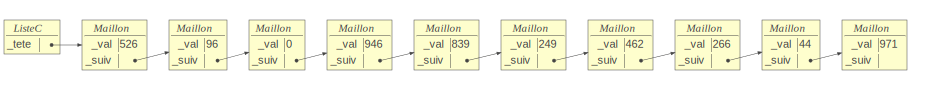

In [77]:
ls = ListeC()
for nb in random.choices(range(1000), k = 10):
    ls = ls.set_tete(nb)
viz(ls)

In [78]:
viz(tranche(ls,2,5))

In [79]:
def fusion(xs: ListeC, ys: ListeC) -> ListeC:
    if xs.est_vide():
        return ys
    elif ys.est_vide():
        return xs
    else:
        tete_xs = xs.get_val_tete()
        tete_ys = ys.get_val_tete()
        if tete_xs <= tete_ys:
            return fusion(xs.queue(), ys).set_tete(tete_xs)
        else:
            return fusion(xs, ys.queue()).set_tete(tete_ys)
  
def tri_fusion(xs: ListeC) -> ListeC:
    t = xs.taille()
    if t < 2:
        return xs
    else:
        return fusion(tri_fusion(tranche(xs, 0, t//2 - 1)), tri_fusion(tranche(xs, t//2, t - 1))) 

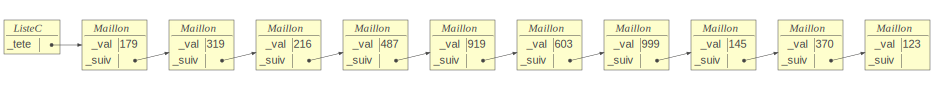

In [80]:
ls = ListeC()
for nb in random.choices(range(1000), k = 10):
    ls = ls.set_tete(nb)
viz(ls)

In [81]:
viz(tri_fusion(ls))
#viz(ls)

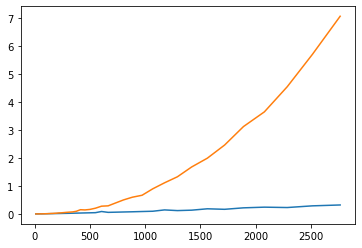

In [87]:
x, y = liste_temps(tri_fusion, 10)
plt.plot(x, y)
x, y = liste_temps(tri_ins_rec, 10)
plt.plot(x, y)
plt.show()